In [1]:
from Tree_Explainer import *
from Linear_Explainer import *

<h1>Example<h1>

In [2]:
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


<h2>Tree construction<h2>

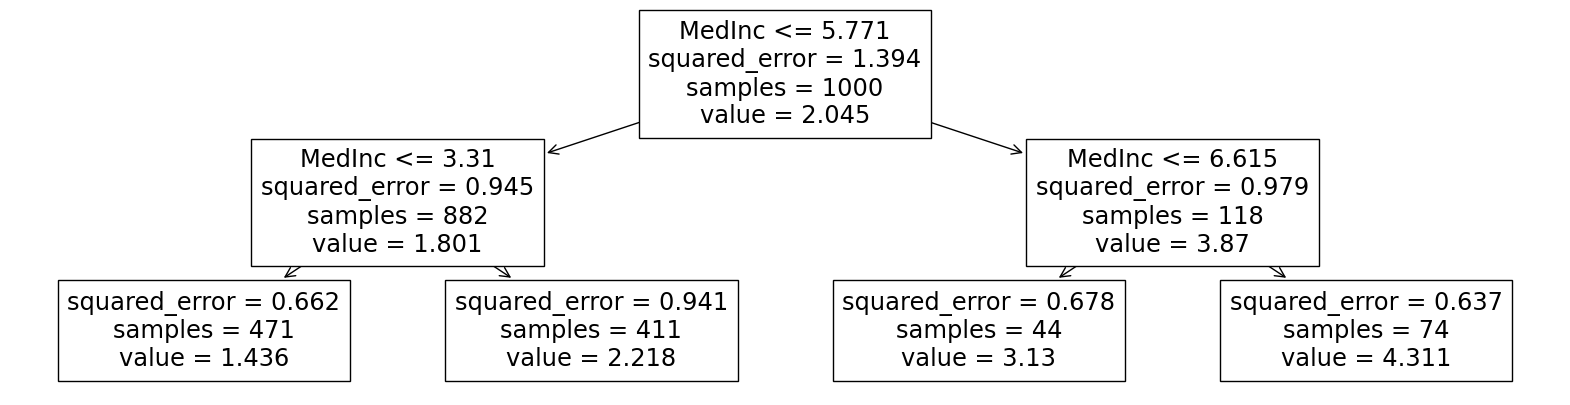

<Figure size 640x480 with 0 Axes>

In [3]:
model = DecisionTreeRegressor(max_depth=2)
X = X[["MedInc", "AveOccup", "Longitude"]]
model.fit(X, y)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
_ = plot_tree(model, ax=ax, feature_names=X.columns)
plt.show()
plt.clf()

<h3>Shap values for single observation<h3>

In [4]:
shap_tree = SHAP_Tree()
shap_values_0 = shap_tree.calculate_shap_single_value(model=model, X=X, y=y, observation_index=0)
print("SHAP values for observation 0: ", shap_values_0)

SHAP values for observation 0:  [0.17350524 0.         0.        ]


<h3>Shap values for whole data (comparision to shap library)<h3>

In [5]:
shap_tree = SHAP_Tree()
shap_values = shap_tree.calculate_shap_values(model, X, y)
my_shap_agg = np.mean(np.abs(shap_values), axis=0)

In [6]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X).values
shap_agg = np.mean(np.abs(shap_values), axis=0)

In [7]:
tree_compare = pd.DataFrame({"my_shap": my_shap_agg, "shap": shap_agg})
tree_compare.set_index(X.columns, inplace=True)
tree_compare

,my_shap,shap
MedInc,0.573462,0.573462
AveOccup,0.000000,0.000000
Longitude,0.000000,0.000000


<h2>Linear Explainer<h2>

In [8]:
shap_linear = SHAP_Linear()
model = LinearRegression(fit_intercept=False)
shap_values = shap_linear.calculate_shap_values(model, X, y)
my_shap_agg = np.mean(np.abs(shap_values), axis=0)

In [9]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X).values
shap_agg = np.mean(np.abs(shap_values), axis=0)

In [10]:
lienar_compare = pd.DataFrame({"my_shap": my_shap_agg, "shap": shap_agg})
lienar_compare.set_index(X.columns, inplace=True)
lienar_compare

,my_shap,shap
MedInc,0.565891,0.561194
AveOccup,0.154364,0.154383
Longitude,0.018994,0.018824


<h1>SHAP chart interpretation<h1>

<h2>Download data<h2>

In [11]:
X, y = shap.datasets.california()
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


<h2>Train model<h2>

In [12]:
model = LGBMRegressor(random_state=17)
model.fit(X, y)
y_pred = model.predict(X)
print("MSE: ", mean_squared_error(y, y_pred))

MSE:  0.16185924439865307


<h2>Compute SHAP values<h2>

In [13]:
explainer = shap.Explainer(model)
shap_values = explainer(X)
explainer.expected_value, np.mean(y)

(2.0685581691258843, 2.068558169089147)

$\text{As we can see the expected value is equal to mean of our dependent variable.}$

<h2>SHAP Analysis<h2>

<h3>Local<h3>

In [14]:
i_med = np.argsort(y_pred)[len(y_pred)//2]
i_max = np.argmax(y_pred)
i_80 = np.argsort(y_pred)[int(len(y_pred)*0.8)]
i_60 = np.argsort(y_pred)[int(len(y_pred)*0.6)]
i_40 = np.argsort(y_pred)[int(len(y_pred)*0.4)]
i_20 = np.argsort(y_pred)[int(len(y_pred)*0.2)]
i_min = np.argmin(y_pred)

<h4>Waterfall plot<h4>

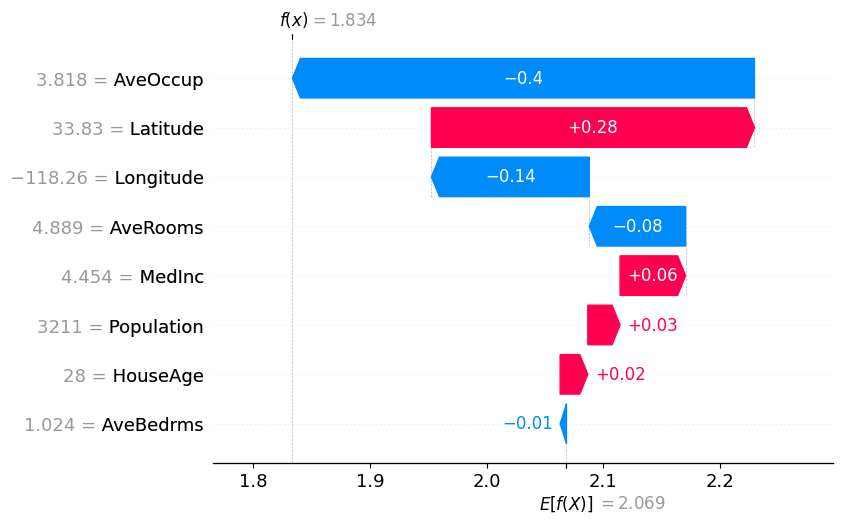

In [15]:
shap.plots.waterfall(shap_values[i_med], show=False)
plt.show()
plt.clf()

<h4>Force plot<h4>

<Figure size 640x480 with 0 Axes>

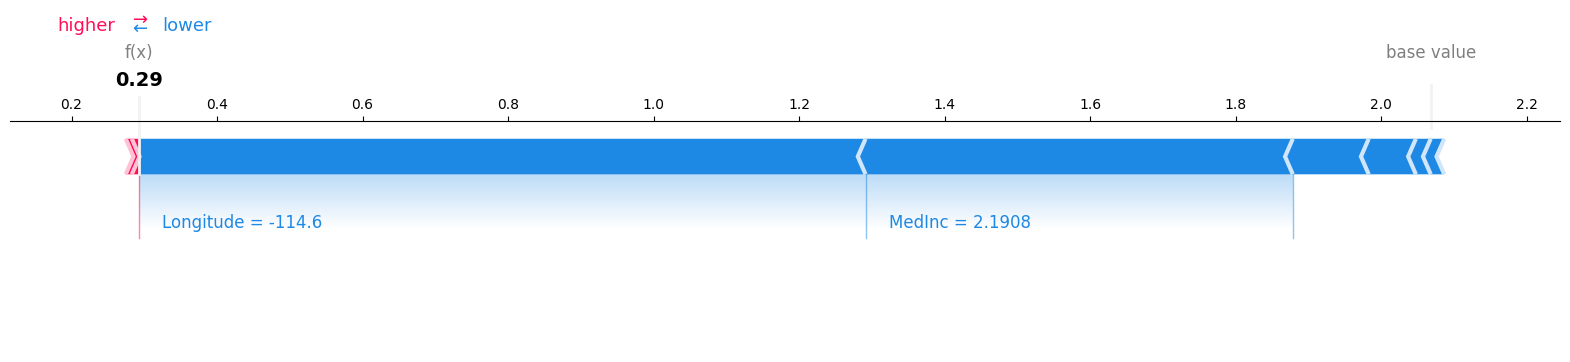

In [16]:
shap.plots.force(shap_values[i_min], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

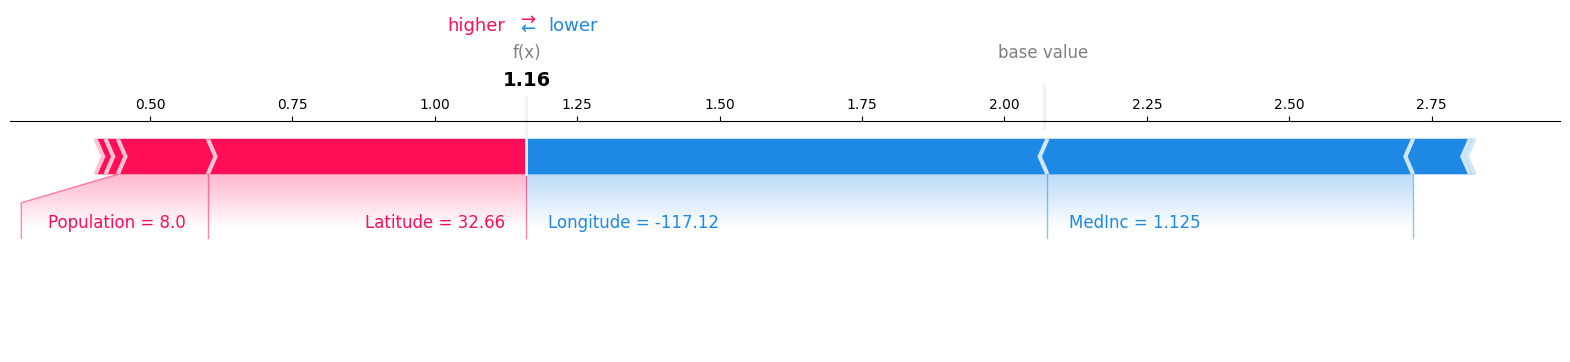

In [17]:
shap.plots.force(shap_values[i_20], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

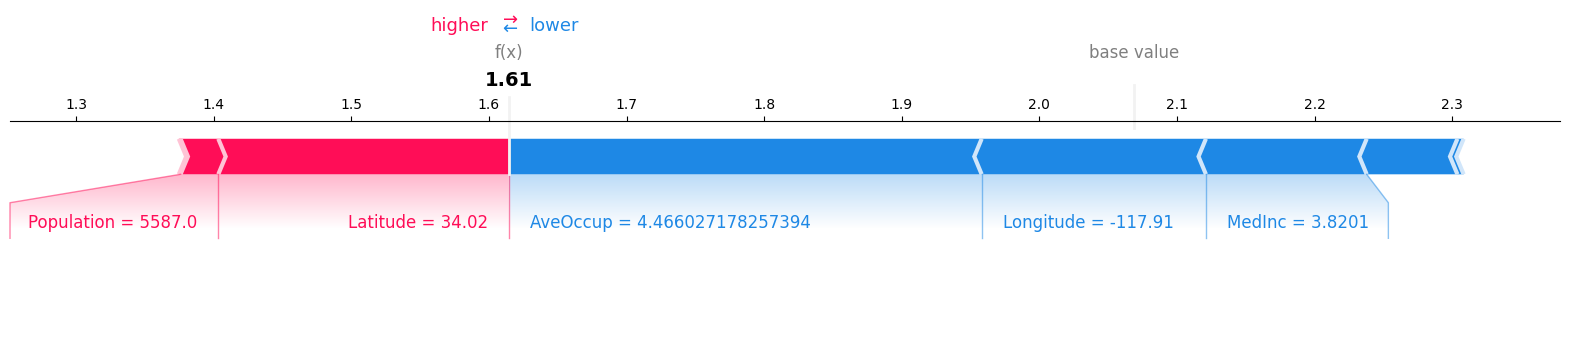

In [18]:
shap.plots.force(shap_values[i_40], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

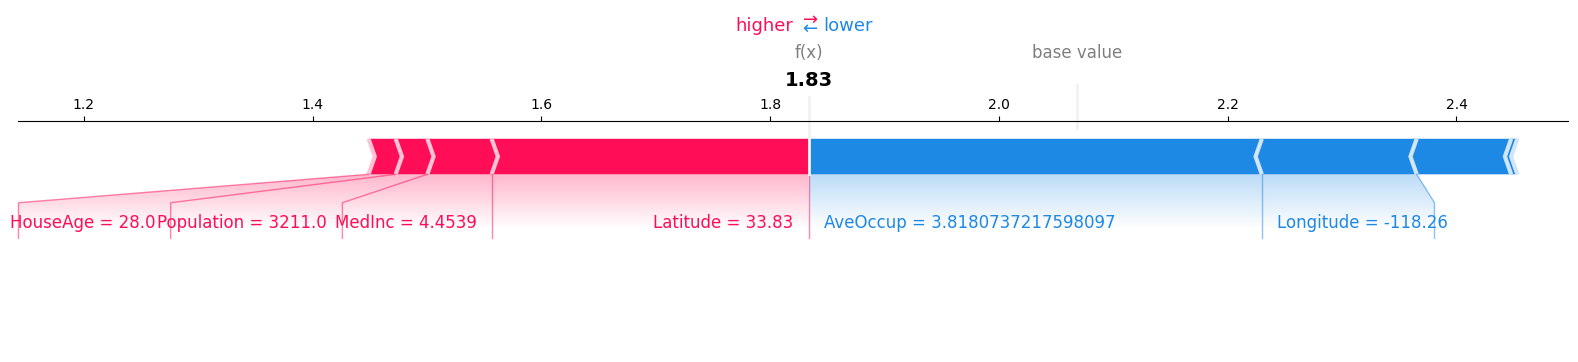

In [19]:
shap.plots.force(shap_values[i_med], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

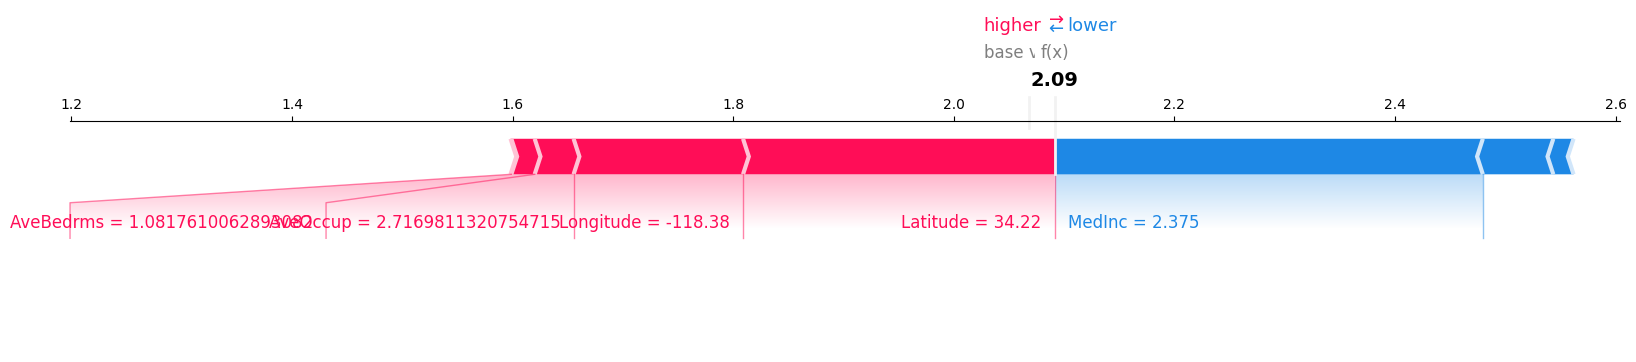

In [20]:
shap.plots.force(shap_values[i_60], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

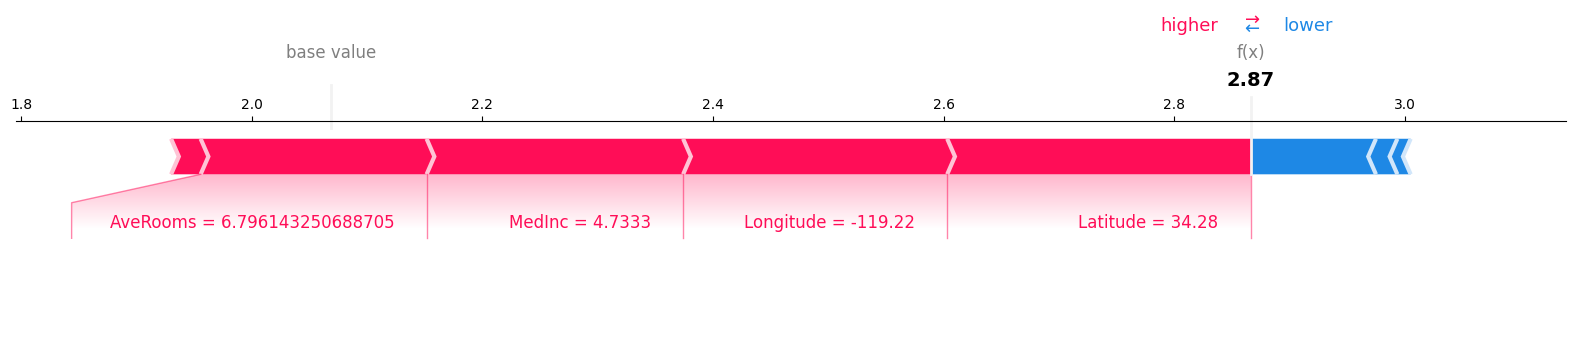

In [21]:
shap.plots.force(shap_values[i_80], matplotlib=True, show=False)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

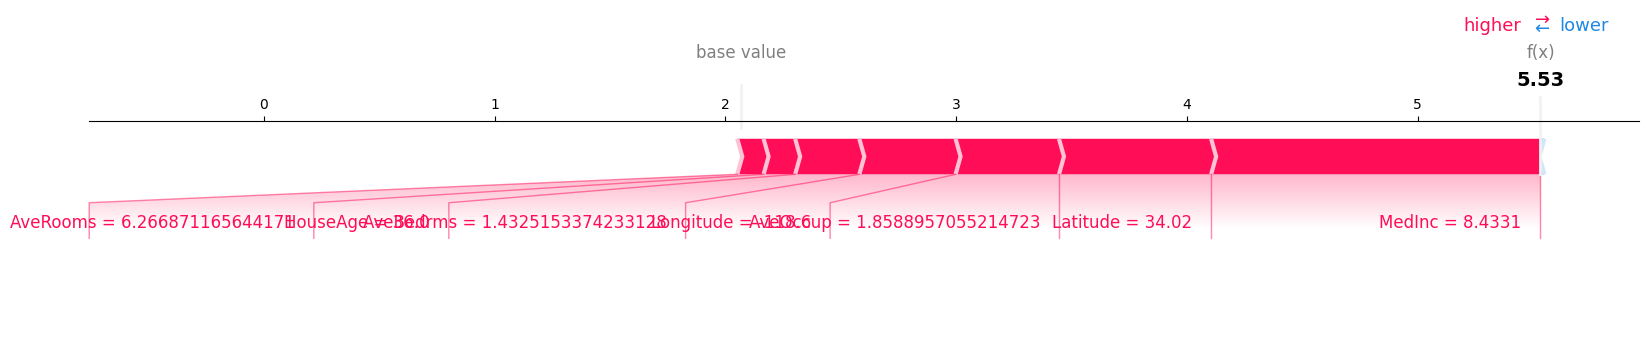

In [22]:
shap.plots.force(shap_values[i_max], matplotlib=True, show=False)
plt.show()
plt.clf()

<h3>Global<h3>

<h4>Bar plot<h4>

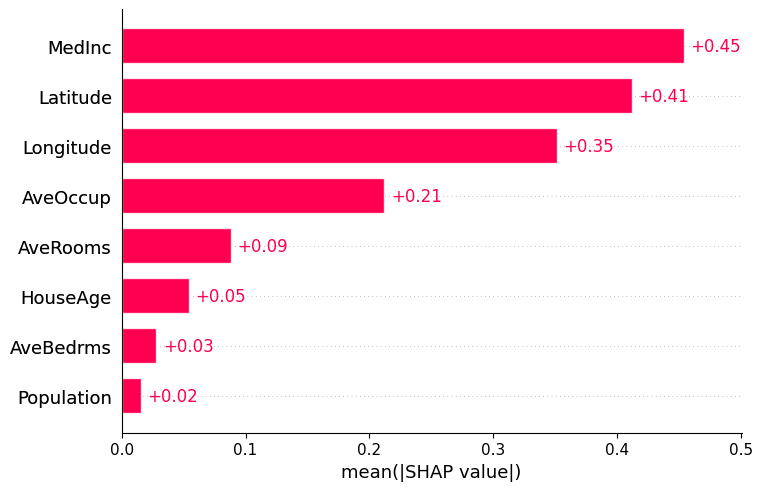

In [23]:
shap.plots.bar(shap_values, max_display=99, show=False)
plt.show()
plt.clf()

<h4>Beeswarm plot<h4>

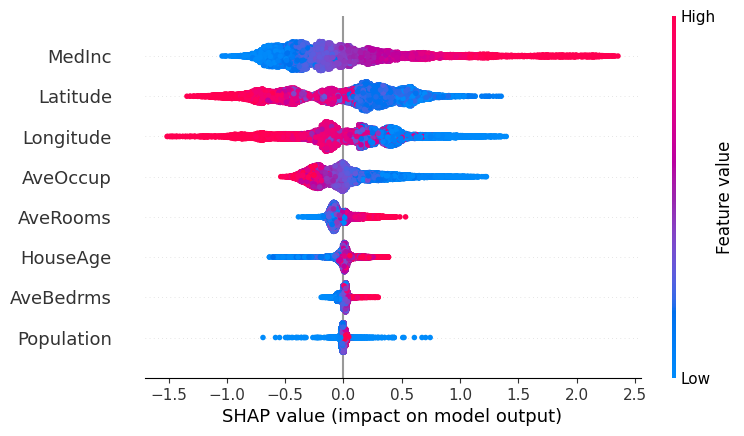

In [24]:
shap.plots.beeswarm(shap_values, max_display=99, show=False)
plt.show()
plt.clf()

<h4>Dependence plot<h4>

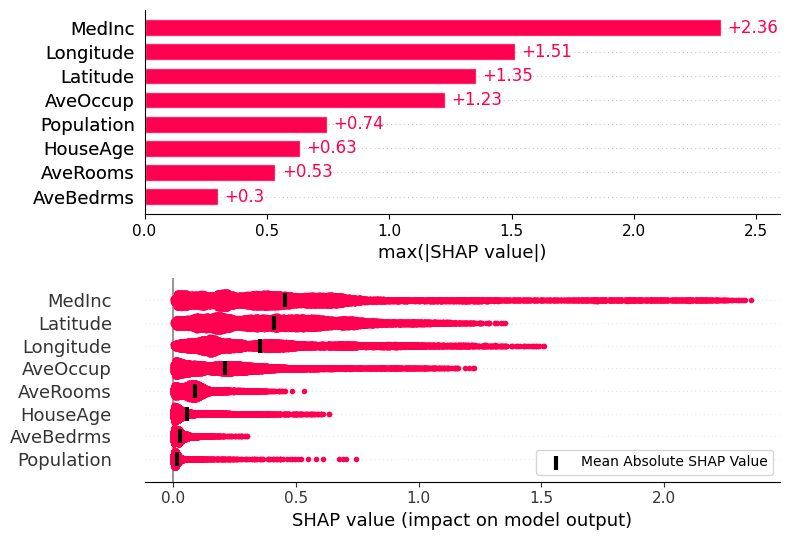

In [25]:
plt.subplot(2, 1, 1)
plt.gcf()
shap.plots.bar(shap_values.abs.max(0), max_display=99, show=False)
plt.subplot(2, 1, 2)
shap.plots.beeswarm(
    shap_values.abs, color="shap_red", max_display=99, show=False, plot_size=None
)
ax = plt.gca()
masv = {}
for feature in ax.get_yticklabels():
    name = feature.get_text()
    col_ind = X.columns.get_loc(name)
    mean_abs_sv = np.mean(np.abs(shap_values.values[:, col_ind]))
    masv[name] = mean_abs_sv
ax.scatter(
    masv.values(),
    [i for i in range(len(X.columns))],
    zorder=99,
    label="Mean Absolute SHAP Value",
    c="k",
    marker="|",
    linewidths=3,
    s=100,
)
ax.legend(frameon=True)
plt.tight_layout()
plt.show()

FixedFormatter should only be used together with FixedLocator


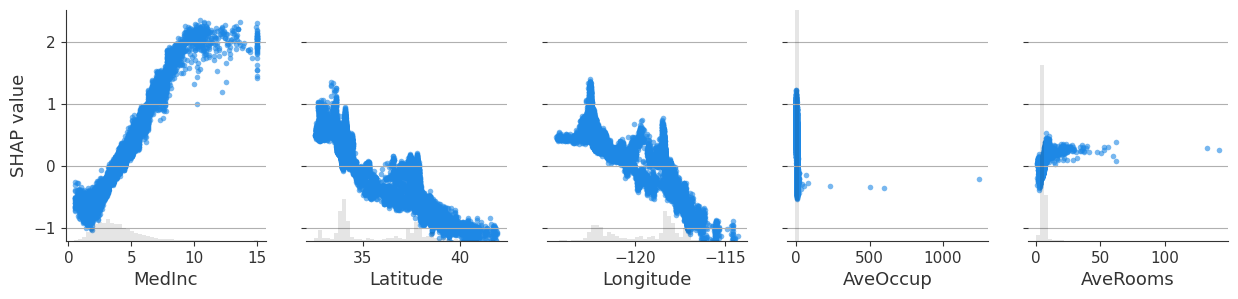

In [26]:
n = 5
fig, ax = plt.subplots(1, n, figsize=(15, 3))

for i, (k, v) in enumerate(sorted(masv.items(), key=lambda x: x[1], reverse=True)):
    if i < n:
        shap.plots.scatter(shap_values[:, k], ax=ax[i], show=False, alpha=0.6)
        ax[i].grid(axis="y")
        if i != 0:
            ax[i].set_ylabel("")
            ax[i].spines["left"].set_visible(False)
            ax[i].set_ylim(ax[0].get_ylim())
            ax[i].set_yticklabels(["" for _ in range(len(ax[0].get_yticks()))])
        else:
            ax[i].set_ylabel("SHAP value")
plt.show()